In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [ ]:
dataset=pd.read_csv("/content/Islamabad_Car_Prices.csv")

In [ ]:
dataset.head()

,Sr. no,Make,Model,Make_Year,Engine,Seating,Price
0,0,Mitsubishi,Mitsubishi Minica,2019,660,4,1065000
1,1,Audi,Audi A6,2015,1800,5,9300000
2,2,Toyota,Toyota Aqua,2014,1500,5,2375000
3,3,Honda,Honda City,2017,1300,5,2600000
4,4,Toyota,Toyota Corolla,2017,1300,5,2500000


In [ ]:
dataset.tail()

,Sr. no,Make,Model,Make_Year,Engine,Seating,Price
199026,199027,Mazda,Mazda RX,2005,2000,5,1000000
199027,199028,Mercedes,Mercedes Benz,2015,2000,5,1200000
199028,199029,Suzuki,Suzuki Bolan,2015,800,8,550000
199029,199030,Mercedes,Mercedes Benz,2011,1796,5,6500000
199030,199031,Kia,Kia Sportage,2003,2000,5,750000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199031 entries, 0 to 199030
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Sr. no     199031 non-null  int64 
 1   Make       199031 non-null  object
 2   Model      199031 non-null  object
 3   Make_Year  199031 non-null  int64 
 4   Engine     199031 non-null  int64 
 5   Seating    199031 non-null  int64 
 6   Price      199031 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 10.6+ MB


In [ ]:
dataset.describe()

,Sr. no,Make_Year,Engine,Seating,Price
count,199031.000000,199031.000000,199031.000000,199031.000000,1.990310e+05
mean,99515.231356,2011.603514,1381.628621,5.051500,2.448143e+06
std,57455.753064,6.763455,663.336787,0.392246,3.566267e+06
min,0.000000,1990.000000,1.000000,2.000000,1.000000e+05
25%,49757.500000,2007.000000,1000.000000,5.000000,9.300000e+05
50%,99515.000000,2013.000000,1300.000000,5.000000,1.650000e+06
75%,149272.500000,2017.000000,1600.000000,5.000000,2.750000e+06
max,199031.000000,2021.000000,10000.000000,8.000000,9.500000e+07


In [ ]:
dataset.columns

Index(['Sr. no', 'Make', 'Model', 'Make_Year', 'Engine', 'Seating', 'Price'], dtype='object')

In [ ]:
dataset.shape

(199031, 7)

**Data** **Preprocessing**

In [ ]:
dataset=dataset.drop(columns="Sr. no")

In [ ]:
dataset.columns

Index(['Make', 'Model', 'Make_Year', 'Engine', 'Seating', 'Price'], dtype='object')

In [ ]:
dataset.describe()

,Make_Year,Engine,Seating,Price
count,199031.000000,199031.000000,199031.000000,1.990310e+05
mean,2011.603514,1381.628621,5.051500,2.448143e+06
std,6.763455,663.336787,0.392246,3.566267e+06
min,1990.000000,1.000000,2.000000,1.000000e+05
25%,2007.000000,1000.000000,5.000000,9.300000e+05
50%,2013.000000,1300.000000,5.000000,1.650000e+06
75%,2017.000000,1600.000000,5.000000,2.750000e+06
max,2021.000000,10000.000000,8.000000,9.500000e+07


In [ ]:
dataset.loc[dataset['Engine']<600]

,Make,Model,Make_Year,Engine,Seating,Price
876,Suzuki,Suzuki Alto,1998,100,5,410000
1399,Toyota,Toyota Land,2005,6,5,5000000
1695,Suzuki,Suzuki Alto,2005,100,5,565000
2957,Toyota,Toyota Vitz,2017,100,5,2700000
3004,Toyota,Toyota Belta,2014,45,5,1650000
4390,Audi,Audi e-tron,2020,300,5,15800000
6880,Honda,Honda Freed,2015,100,5,3200000
7122,Mitsubishi,Mitsubishi Lancer,1990,100,5,390000
7219,Suzuki,Suzuki Carry,2016,1,5,930000
13998,United,United Alpha,2019,12,5,1000000


In [ ]:
dataset=dataset.drop(dataset[dataset['Engine']<600].index)

In [ ]:
dataset.describe()

,Make_Year,Engine,Seating,Price
count,198979.000000,198979.000000,198979.000000,1.989790e+05
mean,2011.604069,1381.964097,5.051483,2.448227e+06
std,6.762532,663.095810,0.392185,3.566392e+06
min,1990.000000,600.000000,2.000000,1.000000e+05
25%,2007.000000,1000.000000,5.000000,9.300000e+05
50%,2013.000000,1300.000000,5.000000,1.650000e+06
75%,2017.000000,1600.000000,5.000000,2.750000e+06
max,2021.000000,10000.000000,8.000000,9.500000e+07


In [ ]:
dataset.isnull().sum()

Make         0
Model        0
Make_Year    0
Engine       0
Seating      0
Price        0
dtype: int64

In [ ]:
dataset = dataset.dropna(axis=0)

In [ ]:
dataset.isnull().sum()

Make         0
Model        0
Make_Year    0
Engine       0
Seating      0
Price        0
dtype: int64

In [ ]:
dataset.loc[dataset.Model=='Toyota Fortuner','Seating']=7

In [ ]:
dataset.query("Model=='Toyota Fortuner'")

,Make,Model,Make_Year,Engine,Seating,Price
58,Toyota,Toyota Fortuner,2016,2700,7,6650000
96,Toyota,Toyota Fortuner,2021,2800,7,10700000
106,Toyota,Toyota Fortuner,2018,2700,7,8600000
232,Toyota,Toyota Fortuner,2020,2700,7,9200000
296,Toyota,Toyota Fortuner,2017,2700,7,8000000
...,...,...,...,...,...,...
152680,Toyota,Toyota Fortuner,2021,2700,7,9200000
152709,Toyota,Toyota Fortuner,2020,2700,7,9500000
152843,Toyota,Toyota Fortuner,2019,2800,7,9950000
152921,Toyota,Toyota Fortuner,2020,2800,7,3000000


In [ ]:
dataset.loc[dataset.Model=='Mazda Scrum','Seating']=4

In [ ]:
dataset.query("Model=='Mazda Scrum'")

,Make,Model,Make_Year,Engine,Seating,Price
2776,Mazda,Mazda Scrum,2016,660,4,1495000
2950,Mazda,Mazda Scrum,2013,660,4,1550000
3754,Mazda,Mazda Scrum,2015,660,4,990000
4768,Mazda,Mazda Scrum,2013,660,4,1190000
5182,Mazda,Mazda Scrum,2016,660,4,1675000
...,...,...,...,...,...,...
142880,Mazda,Mazda Scrum,2013,660,4,1195000
143231,Mazda,Mazda Scrum,2013,660,4,1300000
143612,Mazda,Mazda Scrum,2014,660,4,1300000
146073,Mazda,Mazda Scrum,2011,660,4,1020000


In [ ]:
dataset.to_csv('Islamabad_Car_Prices_Dataset.csv')

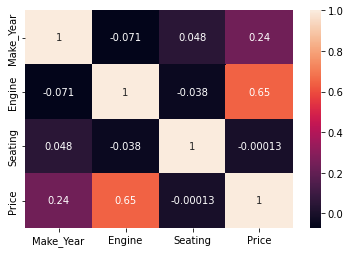

In [ ]:
corr=dataset.corr(method='pearson')  
sns.heatmap(corr, annot=True)

**Label Encoding and Decoding for Corelation**

In [ ]:
# creating LabelEncoder object
le = LabelEncoder()
#encoding model column
dataset['Model'] = le.fit_transform(dataset['Model'])
dataset

,Make,Model,Make_Year,Engine,Seating,Price
0,Mitsubishi,455,2019,660,4,1065000
1,Audi,14,2015,1800,5,9300000
2,Toyota,753,2014,1500,5,2375000
3,Honda,214,2017,1300,5,2600000
4,Toyota,788,2017,1300,5,2500000
...,...,...,...,...,...,...
199026,Mazda,415,2005,2000,5,1000000
199027,Mercedes,423,2015,2000,5,1200000
199028,Suzuki,658,2015,800,8,550000
199029,Mercedes,423,2011,1796,5,6500000


In [ ]:
# creating LabelEncoder object 2 fo 2nd column
le2 = LabelEncoder()
dataset['Make'] = le2.fit_transform(dataset['Make'])
dataset

,Make,Model,Make_Year,Engine,Seating,Price
0,44,455,2019,660,4,1065000
1,1,14,2015,1800,5,9300000
2,60,753,2014,1500,5,2375000
3,25,214,2017,1300,5,2600000
4,60,788,2017,1300,5,2500000
...,...,...,...,...,...,...
199026,42,415,2005,2000,5,1000000
199027,43,423,2015,2000,5,1200000
199028,58,658,2015,800,8,550000
199029,43,423,2011,1796,5,6500000


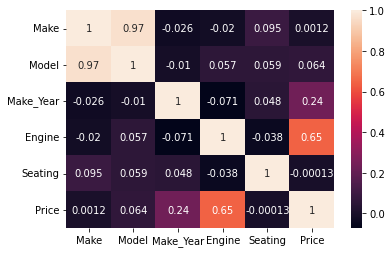

In [ ]:
corr=dataset.corr(method='pearson')  
sns.heatmap(corr, annot=True)

In [ ]:
# decoding
dataset['Model']=le.inverse_transform(dataset.iloc[:,1].values)
dataset

,Make,Model,Make_Year,Engine,Seating,Price
0,44,Mitsubishi Minica,2019,660,4,1065000
1,1,Audi A6,2015,1800,5,9300000
2,60,Toyota Aqua,2014,1500,5,2375000
3,25,Honda City,2017,1300,5,2600000
4,60,Toyota Corolla,2017,1300,5,2500000
...,...,...,...,...,...,...
199026,42,Mazda RX,2005,2000,5,1000000
199027,43,Mercedes Benz,2015,2000,5,1200000
199028,58,Suzuki Bolan,2015,800,8,550000
199029,43,Mercedes Benz,2011,1796,5,6500000


In [ ]:
# decoding
dataset['Make']=le2.inverse_transform(dataset.iloc[:,0].values)
dataset

,Make,Model,Make_Year,Engine,Seating,Price
0,Mitsubishi,Mitsubishi Minica,2019,660,4,1065000
1,Audi,Audi A6,2015,1800,5,9300000
2,Toyota,Toyota Aqua,2014,1500,5,2375000
3,Honda,Honda City,2017,1300,5,2600000
4,Toyota,Toyota Corolla,2017,1300,5,2500000
...,...,...,...,...,...,...
199026,Mazda,Mazda RX,2005,2000,5,1000000
199027,Mercedes,Mercedes Benz,2015,2000,5,1200000
199028,Suzuki,Suzuki Bolan,2015,800,8,550000
199029,Mercedes,Mercedes Benz,2011,1796,5,6500000


**Feature Selection**

In [ ]:
X=dataset[['Make', 'Model', 'Make_Year', 'Engine', 'Seating']]
Y=dataset[['Price']]


In [ ]:
X.head()

,Make,Model,Make_Year,Engine,Seating
0,Mitsubishi,Mitsubishi Minica,2019,660,4
1,Audi,Audi A6,2015,1800,5
2,Toyota,Toyota Aqua,2014,1500,5
3,Honda,Honda City,2017,1300,5
4,Toyota,Toyota Corolla,2017,1300,5


In [ ]:
Y.head()

,Price
0,1065000
1,9300000
2,2375000
3,2600000
4,2500000


In [ ]:
X.shape

(198979, 5)

In [ ]:
Y.shape

(198979, 1)

**Train test split**

In [ ]:
train, test =train_test_split(dataset, test_size=0.2, random_state=42, shuffle=True)

x_train=train[['Make','Model', 'Make_Year', 'Engine', 'Seating']]
x_test=test[['Make','Model', 'Make_Year', 'Engine', 'Seating']]
y_train=train["Price"]
y_test=test["Price"]

In [ ]:
x_train.shape

(159183, 5)

In [ ]:
x_test.shape

(39796, 5)

In [ ]:
type(x_test)

pandas.core.frame.DataFrame

In [ ]:
y_train.shape

(159183,)

In [ ]:
y_test.shape

(39796,)

In [ ]:
x_train.head()

,Make,Model,Make_Year,Engine,Seating
144153,Toyota,Toyota Corolla,2016,1600,5
19677,Suzuki,Suzuki Baleno,2004,1300,5
84625,Honda,Honda Civic,1996,1500,5
74611,Toyota,Toyota Vitz,2017,1000,5
117482,Suzuki,Suzuki Mehran,2012,800,5


**OneHot Encoding**

In [ ]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['Make','Model']])

OneHotEncoder(handle_unknown='ignore')

**Column Transforming**

In [ ]:
column_transform=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Make','Model']),remainder='passthrough')

**Applying Model**

In [ ]:
model = LinearRegression()

In [ ]:
pipe=make_pipeline(column_transform, model)

In [ ]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Adam', 'Audi', 'BMW', 'Bentley', 'Buick', 'Cadillac', 'Changan',
       'Chery', 'Chevrolet', 'Chrysler', 'Citroen', 'DFSK', 'Daehan',
       'Daewoo', 'Daihatsu', 'Datsun', 'Dodge', 'Dongfeng', 'FAW', 'Fiat',
       'Ford', 'GMC', 'Geely', 'Golden',...
       'Toyota Wish', 'Toyota Wish  1.8', 'Toyota Wish  1.8S',
       'Toyota Wish  1.8X', 'Toyota Wish  2.0Z', 'Toyota Yaris',
       'Toyota iQ', 'Toyota iQ  100G', 'Toyota iQ  100X', 'United Alpha',
       'United Bravo', 'United Bravo  Base', 'Volkswagen Beetle',
       'Volkswagen Golf', 'Volkswagen Touareg', 'Volkswagen Up',
       'Volvo Other', 'Volvo S40', 'Volvo S40  Kinetic', 'ZOTYE Z100'],
      dtype=object)]),
                                                  ['Make', 'Model'])]

In [ ]:
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 -354934472.4064655
Coefficients: 
 [-1.16878301e+06  2.88656803e+06  5.73489802e+06 ...  1.76173425e+05
  1.09978280e+03  5.81936766e+05]


In [ ]:
predictions = pipe.predict(x_test) 

In [ ]:
x_test

,Make,Model,Make_Year,Engine,Seating
66095,Toyota,Toyota Corolla,2009,1800,5
86103,Suzuki,Suzuki Every,2015,660,5
61845,Suzuki,Suzuki Liana,2006,1300,5
63357,Honda,Honda City,2000,1500,5
40190,Honda,Honda Civic,2002,1600,5
...,...,...,...,...,...
83405,Honda,Honda City,2010,1300,5
75433,Suzuki,Suzuki Mehran,2005,800,5
118492,Toyota,Toyota Corolla,2013,1600,5
160268,Toyota,Toyota Passo X,2015,1000,5


In [ ]:
y_test

66095     2080000
86103     1530000
61845      770000
63357      670000
40190     1150000
           ...   
83405     1655000
75433      500000
118492    2500000
160268    1885000
33078     6750000
Name: Price, Length: 39796, dtype: int64

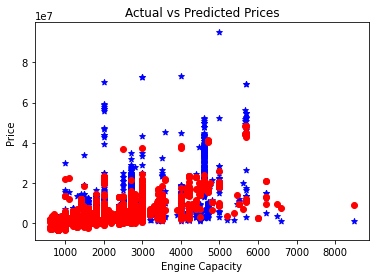

In [ ]:
plt.scatter(x_test.Engine, y_test,marker='*', color="blue") 
plt.scatter(x_test.Engine,predictions,color="red")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Engine Capacity")
plt.ylabel("Price ")
plt.show()

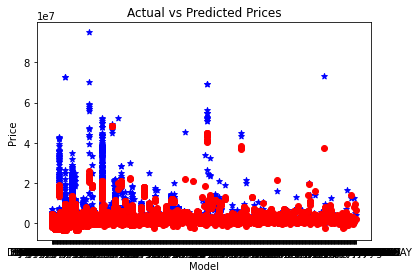

In [ ]:
plt.scatter(x_test.Model, y_test,marker='*', color="blue") 
plt.scatter(x_test.Model,predictions,color="red")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Model")
plt.ylabel("Price ")
plt.show()

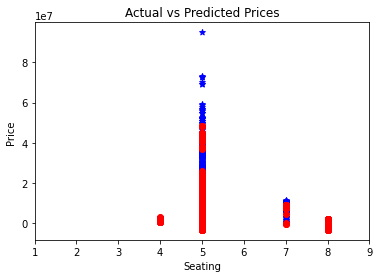

In [ ]:
plt.scatter(x_test.Seating, y_test,marker='*', color="blue") 
plt.scatter(x_test.Seating,predictions,color="red")
plt.title("Actual vs Predicted Prices")
plt.xticks(range(1, 10))
plt.xlabel("Seating")
plt.ylabel("Price ")
plt.show()

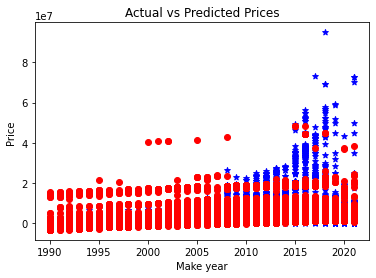

In [ ]:
plt.scatter(x_test.Make_Year, y_test,marker='*', color="blue") 
plt.scatter(x_test.Make_Year,predictions,color="red")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Make year")
plt.ylabel("Price ")
plt.show()

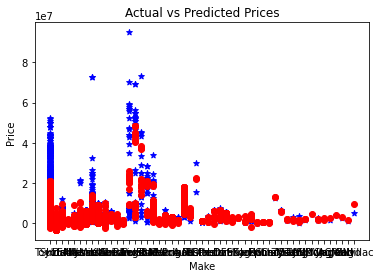

In [ ]:
plt.scatter(x_test.Make, y_test,marker='*', color="blue") 
plt.scatter(x_test.Make,predictions,color="red")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Make")
plt.ylabel("Price ")
plt.show()

In [ ]:
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('Root mean_squared_error : ', math.sqrt(mean_squared_error(y_test, predictions)))

mean_squared_error :  4189313883859.3457
mean_absolute_error :  726910.6937977577
Root mean_squared_error :  2046781.347349869


In [ ]:
print('R2 Score : ', r2_score(y_test, predictions))

R2 Score :  0.686751536181228


In [ ]:
accuracy = pipe.score(x_test,y_test)
print("Accuracy :",accuracy*100,'%')

Accuracy : 68.67515361812279 %


In [ ]:
scores=[]
for i in range(100):
  x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
  model=LinearRegression()
  pipe=make_pipeline(column_transform,model)
  pipe.fit(x_train,y_train)
  predictions=pipe.predict(x_test)
  scores.append(r2_score(y_test, predictions))

In [ ]:
np.argmax(scores)

20

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=np.argmax(scores))
model=LinearRegression()
pipe=make_pipeline(column_transform,model)
pipe.fit(x_train,y_train)
predictions=pipe.predict(x_test)
scores.append(r2_score(y_test, predictions))


**Storing model as .pkl file**

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [ ]:
pipe.predict(pd.DataFrame([['Toyota','Toyota Corolla',2017,1300,5]],columns=['Make','Model', 'Make_Year', 'Engine', 'Seating']))

array([[2979489.05656332]])

In [ ]:
dataset.to_csv('Islamabad_Car_Prices_Dataset.csv')

In [ ]:
print('R2 Score : ', r2_score(y_test, predictions))

R2 Score :  0.706016678657847


In [ ]:
accuracy = pipe.score(x_test,y_test)
print("Accuracy :",accuracy*100,'%')

Accuracy : 70.6016678657847 %


In [ ]:
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('Root mean_squared_error : ', math.sqrt(mean_squared_error(y_test, predictions)))

mean_squared_error :  3878003908342.626
mean_absolute_error :  717053.2018287668
Root mean_squared_error :  1969264.8141737124


In [ ]:
validation_scores=cross_val_score(pipe,dataset,Y,cv=5)
print('Cross Validated Scores : ', validation_scores)
print('Cross Validation Mean : ', validation_scores.mean())

Cross Validated Scores :  [1. 1. 1. 1. 1.]
Cross Validation Mean :  0.9999999999999997
